# Import các package cần thiết

In [1]:
### If your computer does not have the packages below installed, please remove the comment and run this cell again. ###
# install.packages("ggplot2")
# install.packages("corrplot")

library(ggplot2)
library(corrplot)
library(stats)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



# Đọc dữ liệu

In [4]:
## Local path
INPUT_PATH = "./All_GPUs.csv"
## Kaggle path
# INPUT_PATH = "/kaggle/input/computerparts/All_GPUs.csv"

GPU = read.csv(INPUT_PATH,header=TRUE,na.strings=c("","\n- ","\n","\nUnknown Release Date "))
GPU_data = GPU[,c("Name", "Integrated", "Core_Speed", "Max_Power", "Memory", "Memory_Bandwidth", "Memory_Bus","Memory_Speed", "Memory_Type", "Manufacturer", "Open_GL","Shader", "Release_Date")]

In [5]:
summary(GPU_data)

     Name            Integrated         Core_Speed         Max_Power        
 Length:3406        Length:3406        Length:3406        Length:3406       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
    Memory          Memory_Bandwidth    Memory_Bus        Memory_Speed      
 Length:3406        Length:3406        Length:3406        Length:3406       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            

In [4]:
head(GPU_data)

,Name,Integrated,Core_Speed,Max_Power,Memory,Memory_Bandwidth,Memory_Bus,Memory_Speed,Memory_Type,Manufacturer,Open_GL,Shader,Release_Date
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,GeForce GTS 150,No,738 MHz,141 Watts,1024 MB,64GB/sec,256 Bit,1000 MHz,GDDR3,Nvidia,3.3,4,01-Mar-2009
2,Radeon HD 2900 XT 512MB,No,NA,215 Watts,512 MB,106GB/sec,512 Bit,828 MHz,GDDR3,AMD,3.1,4,14-May-2007
3,Radeon HD 2900 Pro,No,NA,200 Watts,512 MB,51.2GB/sec,256 Bit,800 MHz,GDDR3,AMD,3.1,4,07-Dec-2007
4,Radeon HD 2600 XT Diamond Edition,No,NA,NA,256 MB,36.8GB/sec,128 Bit,1150 MHz,GDDR4,AMD,3.3,4,01-Jul-2007
5,Radeon HD 2600 XT,No,NA,45 Watts,256 MB,22.4GB/sec,128 Bit,700 MHz,GDDR3,AMD,3.1,4,28-Jun-2007
6,Radeon HD 2600 XT 256MB GDDR4,No,NA,50 Watts,256 MB,35.2GB/sec,128 Bit,1100 MHz,GDDR4,AMD,3.3,4,26-Jun-2007


# Tiền xử lý số liệu

## Chuyển đổi dữ liệu

In [5]:
find_number <- function(input_string) {
  if(is.na(input_string)) return (NA)

  # Loại bỏ mọi ký tự không phải số từ chuỗi
  numeric_part <- gsub("[^0-9.]+", "", input_string)

  # Chuyển đổi chuỗi thành số
  numeric_value <- as.numeric(numeric_part)

  return(numeric_value)
}

# Core Speed
# Chuyển đổi từ character về double
GPU_data$Core_Speed <- sapply(GPU_data$Core_Speed, find_number)

# Max_Power
# Chuyển đổi từ character về double
GPU_data$Max_Power <- sapply(GPU_data$Max_Power, find_number)

# Memory
# Chuyển đổi từ character về double
GPU_data$Memory = sapply(GPU_data$Memory, find_number)

# Memory_Bandwidth
# Chuyển đổi từ character về double
# [^0-9.] không phải là số hoặc dấu "." thì mới bắt đầu regular expression
GPU_data$Memory_Bandwidth = as.numeric(gsub("[^0-9.]","",GPU_data$Memory_Bandwidth) )

# Memory_Bus
# Chuyển đổi từ character về double
GPU_data$Memory_Bus <- sapply(GPU_data$Memory_Bus, find_number)

# Memory Speed
# Chuyển đổi từ character về double
GPU_data$Memory_Speed = sapply(GPU_data$Memory_Speed, find_number)

# Release Date
# Chuyển đổi từ d-m-y -> year
GPU_data$Release_Date <- trimws(GPU_data$Release_Date)
GPU_data$Release_Date = substr(GPU_data$Release_Date, nchar(GPU_data$Release_Date) - 3, nchar(GPU_data$Release_Date))

## Xử lý missing value

In [6]:
# Tinh so du lieu khuyet
print(apply(is.na(GPU_data),2,sum))

            Name       Integrated       Core_Speed        Max_Power 

               0               14              936              625 

          Memory Memory_Bandwidth       Memory_Bus     Memory_Speed 

             420              121               62              105 

     Memory_Type     Manufacturer          Open_GL           Shader 

              56                0               40              107 

    Release_Date 

              30 


In [7]:
# Tinh ti le du lieu khuyet
print(apply (is.na(GPU_data) ,2, mean))

            Name       Integrated       Core_Speed        Max_Power 

     0.000000000      0.004110393      0.274809160      0.183499706 

          Memory Memory_Bandwidth       Memory_Bus     Memory_Speed 

     0.123311803      0.035525543      0.018203171      0.030827951 

     Memory_Type     Manufacturer          Open_GL           Shader 

     0.016441574      0.000000000      0.011743981      0.031415150 

    Release_Date 

     0.008807986 


In [8]:
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

# Intergrated
# Missing value ít quá nên xóa luôn
GPU_data <- GPU_data[complete.cases(GPU_data$Integrated),]

#CoreSpeed
# Thay thế các missing value bằng trung vị
GPU_data$Core_Speed[is.na(GPU_data$Core_Speed)] = median(GPU_data$Core_Speed, na.rm = TRUE)

#MaxPower
# Thay thế các missing value bằng trung vị
GPU_data$Max_Power[is.na(GPU_data$Max_Power)] = median(GPU_data$Max_Power, na.rm=T)

#Memory
# Thay thế các missing value bằng trung vị
GPU_data$Memory[is.na(GPU_data$Memory)] = median(GPU_data$Memory, na.rm=T)

# Memory Bandwidth
# Thay thế các missing value bằng trung vị
GPU_data$Memory_Bandwidth[is.na(GPU_data$Memory_Bandwidth)] = median(GPU_data$Memory_Bandwidth, na.rm=T)

# Memory Bus
# Thay thế các missing value bằng trung vị
GPU_data$Memory_Bus[is.na(GPU_data$Memory_Bus)] = median(GPU_data$Memory_Bus, na.rm=T)

# Memory Speed
# Thay thế các missing value bằng trung vị
GPU_data$Memory_Speed[is.na(GPU_data$Memory_Speed)] = median(GPU_data$Memory_Speed, na.rm=T)

#MemoryType
# Thay thế các missing value bằng mode
mode_mem_type = getmode(GPU_data$Memory_Type)
GPU_data$Memory_Type[is.na(GPU_data$Memory_Type)] = mode_mem_type

#Open_GL
# Thay thế các missing value bằng trung vị
GPU_data$Open_GL[is.na(GPU_data$Open_GL)] = median(GPU_data$Open_GL, na.rm=T)

#Shader
# Thay thế các missing value bằng trung vị
GPU_data$Shader[is.na(GPU_data$Shader)] = median(GPU_data$Shader, na.rm=T)

# # Release Date
# # Missing value ít quá nên xóa luôn
GPU_data <- GPU_data[complete.cases(GPU_data$Release_Date), ]

## Summary

In [9]:
summary(GPU_data)

     Name            Integrated          Core_Speed       Max_Power    
 Length:3362        Length:3362        Min.   : 100.0   Min.   :  1.0  
 Class :character   Class :character   1st Qu.: 850.0   1st Qu.: 60.0  
 Mode  :character   Mode  :character   Median : 980.0   Median :105.0  
                                       Mean   : 952.5   Mean   :122.2  
                                       3rd Qu.:1040.0   3rd Qu.:150.0  
                                       Max.   :1784.0   Max.   :780.0  
     Memory      Memory_Bandwidth   Memory_Bus      Memory_Speed   
 Min.   :   16   Min.   :   1.0   Min.   :  32.0   Min.   : 100.0  
 1st Qu.: 1024   1st Qu.:  28.8   1st Qu.: 128.0   1st Qu.: 828.5  
 Median : 2048   Median : 105.8   Median : 128.0   Median :1150.0  
 Mean   : 2768   Mean   : 136.9   Mean   : 202.2   Mean   :1169.8  
 3rd Qu.: 4096   3rd Qu.: 192.3   3rd Qu.: 256.0   3rd Qu.:1502.0  
 Max.   :32000   Max.   :1280.0   Max.   :4096.0   Max.   :2127.0  
 Memory_Type        

In [10]:
print( apply(is.na(GPU_data),2,sum) )

            Name       Integrated       Core_Speed        Max_Power 

               0                0                0                0 

          Memory Memory_Bandwidth       Memory_Bus     Memory_Speed 

               0                0                0                0 

     Memory_Type     Manufacturer          Open_GL           Shader 

               0                0                0                0 

    Release_Date 

               0 


In [11]:
head(GPU_data)

,Name,Integrated,Core_Speed,Max_Power,Memory,Memory_Bandwidth,Memory_Bus,Memory_Speed,Memory_Type,Manufacturer,Open_GL,Shader,Release_Date
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,GeForce GTS 150,No,738,141,1024,64.0,256,1000,GDDR3,Nvidia,3.3,4,2009
2,Radeon HD 2900 XT 512MB,No,980,215,512,106.0,512,828,GDDR3,AMD,3.1,4,2007
3,Radeon HD 2900 Pro,No,980,200,512,51.2,256,800,GDDR3,AMD,3.1,4,2007
4,Radeon HD 2600 XT Diamond Edition,No,980,105,256,36.8,128,1150,GDDR4,AMD,3.3,4,2007
5,Radeon HD 2600 XT,No,980,45,256,22.4,128,700,GDDR3,AMD,3.1,4,2007
6,Radeon HD 2600 XT 256MB GDDR4,No,980,50,256,35.2,128,1100,GDDR4,AMD,3.3,4,2007


# Thống kê tả

In [12]:
summary(GPU_data)

     Name            Integrated          Core_Speed       Max_Power    
 Length:3362        Length:3362        Min.   : 100.0   Min.   :  1.0  
 Class :character   Class :character   1st Qu.: 850.0   1st Qu.: 60.0  
 Mode  :character   Mode  :character   Median : 980.0   Median :105.0  
                                       Mean   : 952.5   Mean   :122.2  
                                       3rd Qu.:1040.0   3rd Qu.:150.0  
                                       Max.   :1784.0   Max.   :780.0  
     Memory      Memory_Bandwidth   Memory_Bus      Memory_Speed   
 Min.   :   16   Min.   :   1.0   Min.   :  32.0   Min.   : 100.0  
 1st Qu.: 1024   1st Qu.:  28.8   1st Qu.: 128.0   1st Qu.: 828.5  
 Median : 2048   Median : 105.8   Median : 128.0   Median :1150.0  
 Mean   : 2768   Mean   : 136.9   Mean   : 202.2   Mean   :1169.8  
 3rd Qu.: 4096   3rd Qu.: 192.3   3rd Qu.: 256.0   3rd Qu.:1502.0  
 Max.   :32000   Max.   :1280.0   Max.   :4096.0   Max.   :2127.0  
 Memory_Type        

## Biến định lượng

In [20]:
numerical_cols <- c("Core_Speed", "Max_Power", "Memory", "Memory_Bandwidth", "Memory_Bus", "Memory_Speed","Open_GL", "Shader")

## Biến định tính

In [21]:
categorical_cols <- c("Integrated", "Memory_Type", "Manufacturer", "Release_Date")

## Xây dựng bảng thống kê

In [22]:
summary_numeric_table <- data.frame(
  Staticstic=c("Count", "Mean", "STD", "Min", "First Quantile", "Median", "Third Quantile", "Max")
)
for (i in numerical_cols){
  GPU_data <- GPU_data[complete.cases(GPU_data[[i]]), ]
  count <- length(GPU_data[[i]])
  mean<- mean(GPU_data[[i]])
  std <- sd(GPU_data[[i]])
  min <- min(GPU_data[[i]])
  first_quantile <- sapply(GPU_data[i], function(x) quantile(x, 0.25) )[[1]]
  median <- median(GPU_data[[i]])
  third_quantile <- sapply(GPU_data[i], function(x) quantile(x, 0.75))[[1]]
  max <- max(GPU_data[[i]])
  summary_numeric_table <- cbind(summary_numeric_table,new_col=c(count,mean,std,min,first_quantile,median,third_quantile,max))
}
colnames(summary_numeric_table) <- c("",numerical_cols)

In [23]:
summary_numeric_table

,Core_Speed,Max_Power,Memory,Memory_Bandwidth,Memory_Bus,Memory_Speed,Open_GL,Shader
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Count,3362.00,3362.00000,3362.000,3362.0000,3362.0000,3362.0000,3362.0000000,3362.000000
Mean,952.53,122.15021,2768.345,136.8901,202.2201,1169.8162,4.0179952,4.712136
STD,233.18,93.69584,2639.379,134.8083,213.5379,437.8614,0.8694767,0.686969
Min,100.00,1.00000,16.000,1.0000,32.0000,100.0000,1.0000000,1.000000
First Quantile,850.00,60.00000,1024.000,28.8000,128.0000,828.5000,4.2000000,5.000000
Median,980.00,105.00000,2048.000,105.8000,128.0000,1150.0000,4.4000000,5.000000
Third Quantile,1040.00,150.00000,4096.000,192.3000,256.0000,1502.0000,4.5000000,5.000000
Max,1784.00,780.00000,32000.000,1280.0000,4096.0000,2127.0000,4.5000000,5.000000


## Tính toán

In [24]:
# He so tuong quan
cor(GPU_data[numerical_cols])

,Core_Speed,Max_Power,Memory,Memory_Bandwidth,Memory_Bus,Memory_Speed,Open_GL,Shader
Core_Speed,1.00000000,0.2728679,0.4426817,0.4040253,0.07361465,0.4997886,0.05242435,0.03375095
Max_Power,0.27286786,1.0000000,0.5454530,0.7955125,0.44588240,0.3948387,0.21102644,0.16350676
Memory,0.44268170,0.5454530,1.0000000,0.7638108,0.27668359,0.5394880,0.36982345,0.31662596
Memory_Bandwidth,0.40402527,0.7955125,0.7638108,1.0000000,0.48492376,0.5630759,0.33478596,0.30449837
Memory_Bus,0.07361465,0.4458824,0.2766836,0.4849238,1.00000000,0.1077039,0.11949038,0.08577634
Memory_Speed,0.49978864,0.3948387,0.5394880,0.5630759,0.10770387,1.0000000,0.59109810,0.49718399
Open_GL,0.05242435,0.2110264,0.3698234,0.3347860,0.11949038,0.5910981,1.00000000,0.83903589
Shader,0.03375095,0.1635068,0.3166260,0.3044984,0.08577634,0.4971840,0.83903589,1.00000000


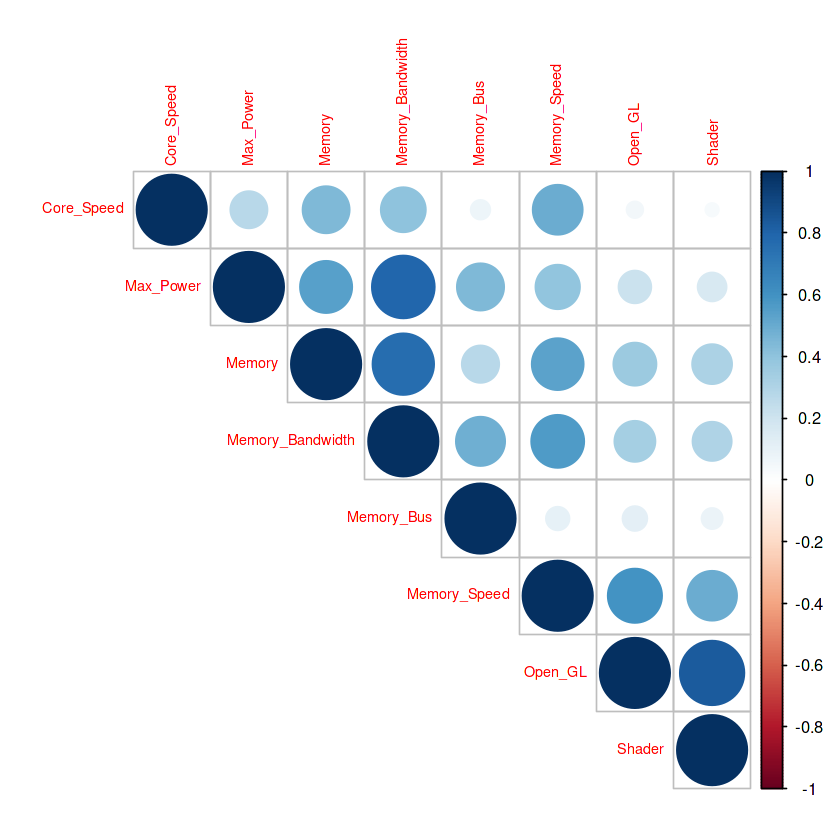

In [29]:
# Tính toán ma trận correlation
correlation_matrix <- cor(GPU_data[numerical_cols])

# Vẽ Correlation plot
corrplot(correlation_matrix, method = "circle", type = "upper", 
         diag = TRUE, tl.cex = 0.7)


In [31]:
Mode <- function(x) {
  uniqx <- unique(x)
  tab <- tabulate(match(x, uniqx))
  return(uniqx[tab == max(tab)])
}

summary_categorical_table <- data.frame(
  Staticstic = c("Count", "Unique", "Mode", "Freq")
)

for (i in categorical_cols) {
  count <- length(GPU_data[[i]])
  unique <- length(unique(GPU_data[[i]]))
  mode <- Mode(GPU_data[[i]])
  freq <- table(GPU_data[[i]])[mode]
  
  summary_categorical_table <- cbind(summary_categorical_table, c(count, unique, mode, freq))
}

colnames(summary_categorical_table) <- c("", categorical_cols)


In [32]:
summary_categorical_table

,Integrated,Memory_Type,Manufacturer,Release_Date
<chr>,<chr>,<chr>,<chr>,<chr>
Count,3362,3362,3362,3362
Unique,2,12,4,20
Mode,No,GDDR5,Nvidia,2012
Freq,2988,2037,1714,526


**Core_Speed**

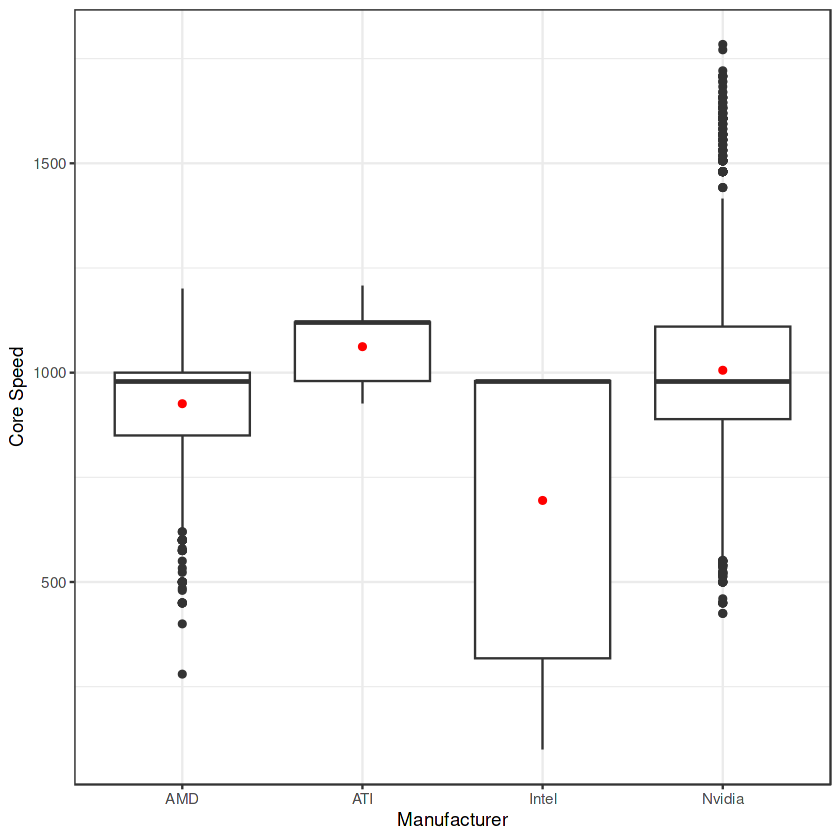

In [40]:
ggplot(GPU_data, aes(x = Manufacturer, y = Core_Speed)) +  # Thiết lập dữ liệu và mapping aesthetics
  geom_boxplot() +  # Vẽ boxplot
  stat_summary(fun.y = "mean", geom = "point", color = "red") +  # Vẽ điểm trung bình
  labs(x = "Manufacturer", y = "Core Speed") +
  theme_bw()  # giao diện

**Max_Power**

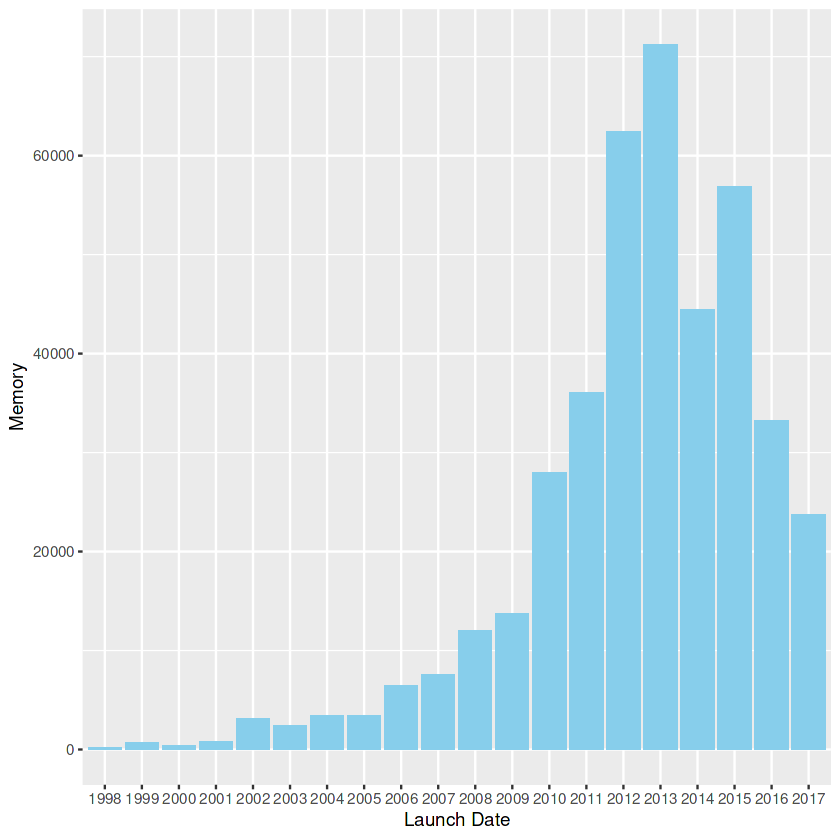

In [41]:
ggplot(GPU_data, aes(x = Release_Date, y = Max_Power)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(x = "Launch Date", y = "Memory")
# "Mean Memory Change Over Time

**Mem, MemSpeed, MemBandwitdh**

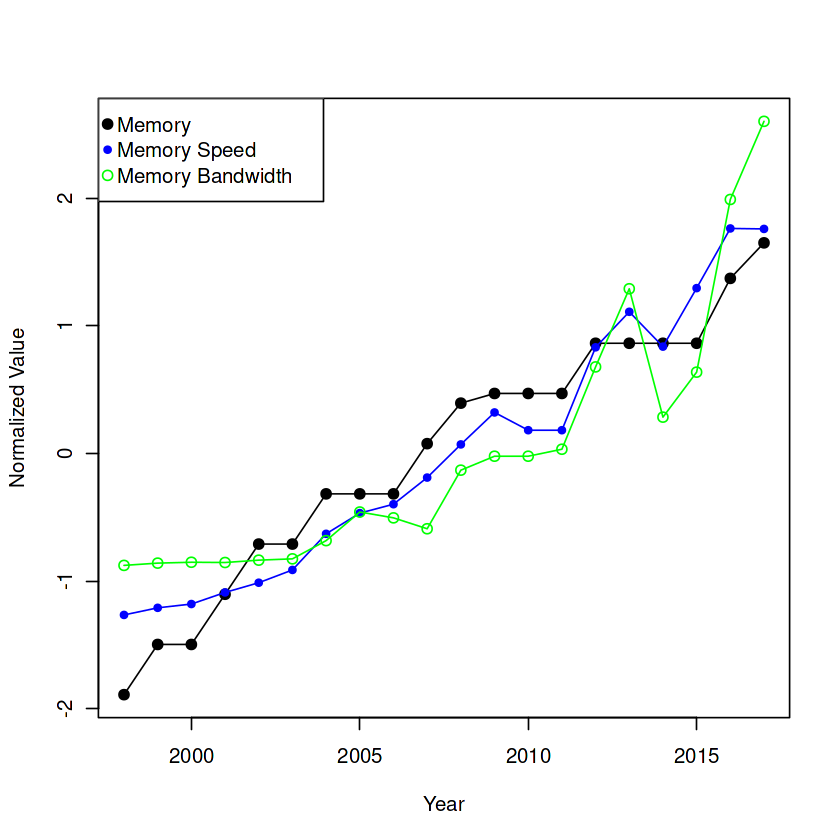

In [42]:
# Lấy trung vị mỗi biến
median_memory_speed <- aggregate(GPU_data$Memory_Speed, by = list(Release_Year = GPU_data$Release_Date), FUN = median)
median_memory_bandwidth <- aggregate(GPU_data$Memory_Bandwidth, by = list(Release_Year = GPU_data$Release_Date), FUN = median)
median_memory <- aggregate(log(GPU_data$Memory), by = list(Release_Year = GPU_data$Release_Date), FUN = median)

# Chuẩn hóa dữ liệu
normalized_memory <- scale(median_memory$x)
normalized_memory_speed <- scale(median_memory_speed$x)
normalized_memory_bandwidth <- scale(median_memory_bandwidth$x)

# Vẽ biểu đồ đường cho sự biến đổi tương đối của Memory, Memory_Speed và Memory_Bandwidth qua các năm
# Relative Change of Memory, Memory Speed, and Memory Bandwidth Over Years
plot(median_memory$Release_Year, normalized_memory, type = "o", xlab = "Year", ylab = "Normalized Value", pch = 19,
     main = "",
     ylim = c(min(c(normalized_memory, normalized_memory_speed, normalized_memory_bandwidth)), 
              max(c(normalized_memory, normalized_memory_speed, normalized_memory_bandwidth))))

lines(median_memory_speed$Release_Year, normalized_memory_speed, type = "o", col = "blue", pch = 20)
lines(median_memory_bandwidth$Release_Year, normalized_memory_bandwidth, type = "o", col = "green", pch = 21)

# Thêm chú thích
legend("topleft", legend = c("Memory", "Memory Speed", "Memory Bandwidth"), 
       col = c("black", "blue", "green"), pch = c(19, 20, 21),
       text.width = 6
      )


# Thống kê suy diễn

## Tìm khoảng tin cậy

In [43]:
print ("Tim khoang tin cay của Memory_Bandwidth:")
t.test(GPU_data$Memory_Bandwidth, conf.level = 0.95)

print ("Tim khoang tin cay cua Memory_Bus:")
t.test(GPU_data$Memory_Bus, conf.level = 0.95)

print ("Tim khoang tin cay cua Memory_speed:")
t.test(GPU_data$Memory_Speed, conf.level = 0.95)

[1] "Tim khoang tin cay của Memory_Bandwidth:"



	One Sample t-test

data:  GPU_data$Memory_Bandwidth
t = 58.878, df = 3361, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 132.3316 141.4486
sample estimates:
mean of x 
 136.8901 


[1] "Tim khoang tin cay cua Memory_Bus:"



	One Sample t-test

data:  GPU_data$Memory_Bus
t = 54.91, df = 3361, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 194.9994 209.4408
sample estimates:
mean of x 
 202.2201 


[1] "Tim khoang tin cay cua Memory_speed:"



	One Sample t-test

data:  GPU_data$Memory_Speed
t = 154.91, df = 3361, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 1155.010 1184.622
sample estimates:
mean of x 
 1169.816 


## Thống kê một mẫu

In [44]:
print("Kiểm định một mẫu đối với Memory_Bandwidth:")
t.test(GPU_data$Memory_Bandwidth, alternative="less", mu=1000, paired=FALSE, var.equal=TRUE, conf.level=0.95)

[1] "Kiểm định một mẫu đối với Memory_Bandwidth:"



	One Sample t-test

data:  GPU_data$Memory_Bandwidth
t = -371.23, df = 3361, p-value < 2.2e-16
alternative hypothesis: true mean is less than 1000
95 percent confidence interval:
     -Inf 140.7154
sample estimates:
mean of x 
 136.8901 


In [45]:
print("Kiểm định một mẫu đối với Memory_Bus:")
t.test(GPU_data$Memory_Bus, alternative="greater", mu=180, paired=FALSE, var.equal=TRUE, conf.level=0.95)

[1] "Kiểm định một mẫu đối với Memory_Bus:"



	One Sample t-test

data:  GPU_data$Memory_Bus
t = 6.0335, df = 3361, p-value = 8.894e-10
alternative hypothesis: true mean is greater than 180
95 percent confidence interval:
 196.1608      Inf
sample estimates:
mean of x 
 202.2201 


In [46]:
print("Kiểm định một mẫu đối với Memory_Speed:")
t.test(GPU_data$Memory_Speed, alternative="two.sided", mu=1169, paired=FALSE, var.equal=TRUE, conf.level=0.95)

[1] "Kiểm định một mẫu đối với Memory_Speed:"



	One Sample t-test

data:  GPU_data$Memory_Speed
t = 0.10808, df = 3361, p-value = 0.9139
alternative hypothesis: true mean is not equal to 1169
95 percent confidence interval:
 1155.010 1184.622
sample estimates:
mean of x 
 1169.816 


## Thống kê hai mẫu

In [47]:
print("Kiểm định hai mẫu:")
t.test(GPU_data$Open_GL, GPU_data$Shader, alternative="two.sided", mu=0, paired=FALSE, var.equal=TRUE, conf.level=0.95)

[1] "Kiểm định hai mẫu:"



	Two Sample t-test

data:  GPU_data$Open_GL and GPU_data$Shader
t = -36.321, df = 6722, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7316042 -0.6566766
sample estimates:
mean of x mean of y 
 4.017995  4.712136 


## Phân tích phương sai ANOVA một yếu tố

### Kiểm tra điều kiện để phân tích phương sai ANOVA

In [48]:
# Kiem dinh Shapiro -Wilk de biet co phan phoi chuan hoac gan chuan:
shapiro_results_1 <- by(GPU_data$Core_Speed, GPU_data$Manufacturer, shapiro.test)
print(shapiro_results_1)

GPU_data$Manufacturer: AMD



	Shapiro-Wilk normality test



data:  dd[x, ]

W = 0.87388, p-value < 2.2e-16



------------------------------------------------------------ 

GPU_data$Manufacturer: ATI



	Shapiro-Wilk normality test



data:  dd[x, ]

W = 0.75897, p-value = 3.309e-10



------------------------------------------------------------ 

GPU_data$Manufacturer: Intel



	Shapiro-Wilk normality test



data:  dd[x, ]

W = 0.70741, p-value < 2.2e-16



------------------------------------------------------------ 

GPU_data$Manufacturer: Nvidia



	Shapiro-Wilk normality test



data:  dd[x, ]

W = 0.95064, p-value < 2.2e-16




In [49]:
# Thực hiện kiểm định Fligner để kiểm tra tính đồng nhất về phương sai giữa các nhóm
fligner.test(GPU_data$Core_Speed ~ as.factor(GPU_data$Manufacturer))


	Fligner-Killeen test of homogeneity of variances

data:  GPU_data$Core_Speed by as.factor(GPU_data$Manufacturer)
Fligner-Killeen:med chi-squared = 254.94, df = 3, p-value < 2.2e-16


### ANOVA một yếu tố

In [50]:
# In thông báo
print("Phân tích ANOVA một yếu tố:")

# Phân tích ANOVA
av <- aov(Core_Speed ~ as.factor(Manufacturer), data = GPU_data)

# Hiển thị kết quả tổng kết của ANOVA
summary(av)

[1] "Phân tích ANOVA một yếu tố:"


                          Df    Sum Sq Mean Sq F value Pr(>F)    
as.factor(Manufacturer)    3  23495849 7831950   165.1 <2e-16 ***
Residuals               3358 159251484   47425                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [51]:
TukeyHSD (av) #so sanh boi

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Core_Speed ~ as.factor(Manufacturer), data = GPU_data)

$`as.factor(Manufacturer)`
                   diff        lwr         upr     p adj
ATI-AMD       136.20680   72.12633  200.287262 0.0000003
Intel-AMD    -231.03703 -269.52807 -192.545987 0.0000000
Nvidia-AMD     79.87853   59.35890  100.398172 0.0000000
Intel-ATI    -367.24383 -438.73751 -295.750144 0.0000000
Nvidia-ATI    -56.32826 -119.97449    7.317961 0.1041357
Nvidia-Intel  310.91556  273.15188  348.679254 0.0000000


## Phân tích phương sai ANOVA hai yếu tố

### Kiểm tra điều kiện để phân tích phương sai ANOVA hai yếu tố

#### Phân phối

In [56]:
# Kiem dinh Shapiro - Wilk de biet co phan phoi chuan hoac gan chuan:
shapiro_results_1 <- by(GPU_data$Memory_Speed, GPU_data$Integrated, shapiro.test)
print(shapiro_results_1)

GPU_data$Integrated: No



	Shapiro-Wilk normality test



data:  dd[x, ]

W = 0.97685, p-value < 2.2e-16



------------------------------------------------------------ 

GPU_data$Integrated: Yes



	Shapiro-Wilk normality test



data:  dd[x, ]

W = 0.91806, p-value = 2.103e-13




In [57]:
# Kiem dinh Shapiro - Wilk de biet co phan phoi chuan hoac gan chuan:
shapiro_results_2 <- by(GPU_data$Memory_Speed, GPU_data$Manufacturer, shapiro.test)
print(shapiro_results_2)

GPU_data$Manufacturer: AMD



	Shapiro-Wilk normality test



data:  dd[x, ]

W = 0.98884, p-value = 1.78e-08



------------------------------------------------------------ 

GPU_data$Manufacturer: ATI



	Shapiro-Wilk normality test



data:  dd[x, ]

W = 0.73558, p-value = 8.97e-11



------------------------------------------------------------ 

GPU_data$Manufacturer: Intel



	Shapiro-Wilk normality test



data:  dd[x, ]

W = 0.92335, p-value = 4.063e-10



------------------------------------------------------------ 

GPU_data$Manufacturer: Nvidia



	Shapiro-Wilk normality test



data:  dd[x, ]

W = 0.96377, p-value < 2.2e-16




#### Phương sai

In [54]:
# Thực hiện kiểm định Fligner để kiểm tra tính đồng nhất về phương sai giữa các nhóm
fligner.test(GPU_data$Memory_Speed ~ as.factor(GPU_data$Integrated))


	Fligner-Killeen test of homogeneity of variances

data:  GPU_data$Memory_Speed by as.factor(GPU_data$Integrated)
Fligner-Killeen:med chi-squared = 142.85, df = 1, p-value < 2.2e-16


In [60]:
# Thực hiện kiểm định Fligner để kiểm tra tính đồng nhất về phương sai giữa các nhóm
fligner.test(GPU_data$Memory_Speed ~ as.factor(GPU_data$Manufacturer))


	Fligner-Killeen test of homogeneity of variances

data:  GPU_data$Memory_Speed by as.factor(GPU_data$Manufacturer)
Fligner-Killeen:med chi-squared = 337.96, df = 3, p-value < 2.2e-16


### ANOVA hai yếu tố

In [62]:
Integrated = as.factor(GPU_data$Integrated)
Manufacturer = as.factor(GPU_data$Manufacturer)

Memory_Speed = GPU_data$Memory_Speed
twoway = lm(Memory_Speed ~ Integrated + Manufacturer + Integrated*Manufacturer)
anova(twoway)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Integrated,1,41004489,41004489.1,243.66898,4.396838e-53
Manufacturer,3,37925300,12641766.6,75.12364,5.026167e-47
Integrated:Manufacturer,2,872196,436098.0,2.59151,7.505676e-02
Residuals,3355,564577647,168279.5,NA,NA


## Hồi quy tuyến tính

### Xây dựng mô hình hồi quy tuyến tính để đánh giá ảnh hưởng của các nhân tố lên Core_Speed

In [63]:
# model1: mo hinh hoi quy ban dau voi day du cac bien
model1 = lm(Core_Speed ~ Max_Power + Memory + Memory_Bandwidth + Memory_Bus + Memory_Speed + Open_GL + Shader, data = GPU_data)
summary(model1)


Call:
lm(formula = Core_Speed ~ Max_Power + Memory + Memory_Bandwidth + 
    Memory_Bus + Memory_Speed + Open_GL + Shader, data = GPU_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-880.53  -85.16   14.52  109.52  737.90 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      997.026172  23.773368  41.939   <2e-16 ***
Max_Power         -0.161101   0.056529  -2.850   0.0044 ** 
Memory             0.023158   0.001921  12.052   <2e-16 ***
Memory_Bandwidth   0.127302   0.055479   2.295   0.0218 *  
Memory_Bus        -0.023597   0.017519  -1.347   0.1781    
Memory_Speed       0.307902   0.010461  29.434   <2e-16 ***
Open_GL          -94.036724   7.202841 -13.056   <2e-16 ***
Shader           -17.811754   8.453874  -2.107   0.0352 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 181.5 on 3354 degrees of freedom
Multiple R-squared:  0.3953,	Adjusted R-squared:  0.3941 
F-statistic: 313.3 on 7 an

In [64]:
# model2: mo hinh hoi quy cai tien sau khi bo di cac bien co muc y nghia thap cua model1 (p-value > 0.05)
model2 = lm(Core_Speed ~ Max_Power + Memory + Memory_Bandwidth + Memory_Speed + Open_GL + Shader, data = GPU_data)
summary(model2)


Call:
lm(formula = Core_Speed ~ Max_Power + Memory + Memory_Bandwidth + 
    Memory_Speed + Open_GL + Shader, data = GPU_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-883.66  -85.60   14.32  109.09  740.38 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      992.734395  23.561730  42.133  < 2e-16 ***
Max_Power         -0.166665   0.056385  -2.956  0.00314 ** 
Memory             0.023481   0.001907  12.315  < 2e-16 ***
Memory_Bandwidth   0.102960   0.052459   1.963  0.04977 *  
Memory_Speed       0.310984   0.010209  30.463  < 2e-16 ***
Open_GL          -95.063764   7.163237 -13.271  < 2e-16 ***
Shader           -17.141576   8.440244  -2.031  0.04234 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 181.5 on 3355 degrees of freedom
Multiple R-squared:  0.395,	Adjusted R-squared:  0.3939 
F-statistic: 365.1 on 6 and 3355 DF,  p-value: < 2.2e-16


### Kiểm tra các giả định

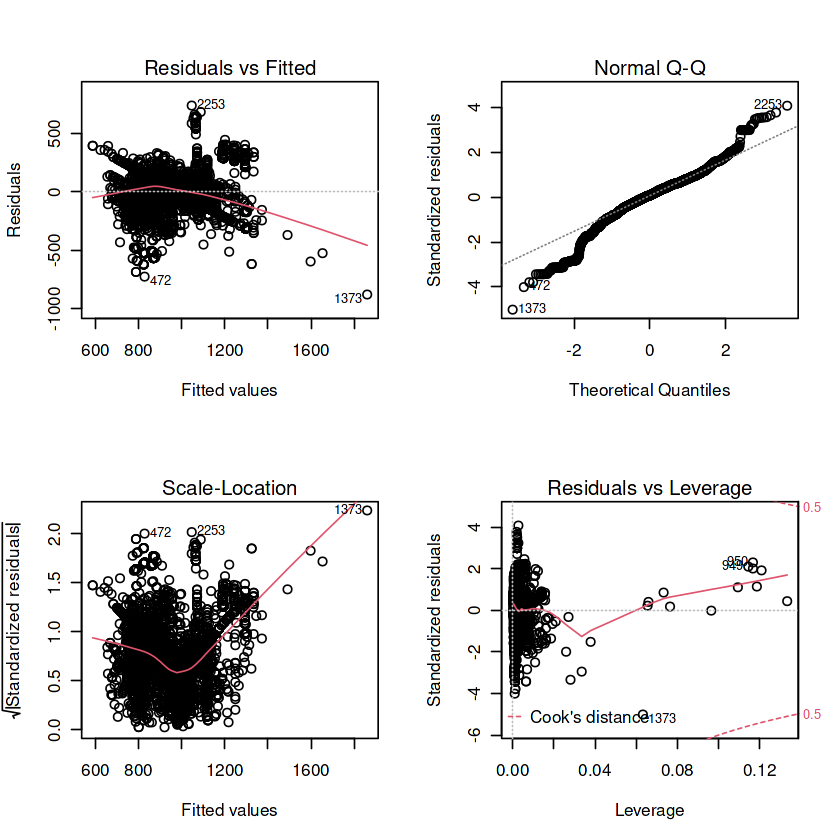

In [65]:
par(mfrow=c(2,2))
plot(model1)

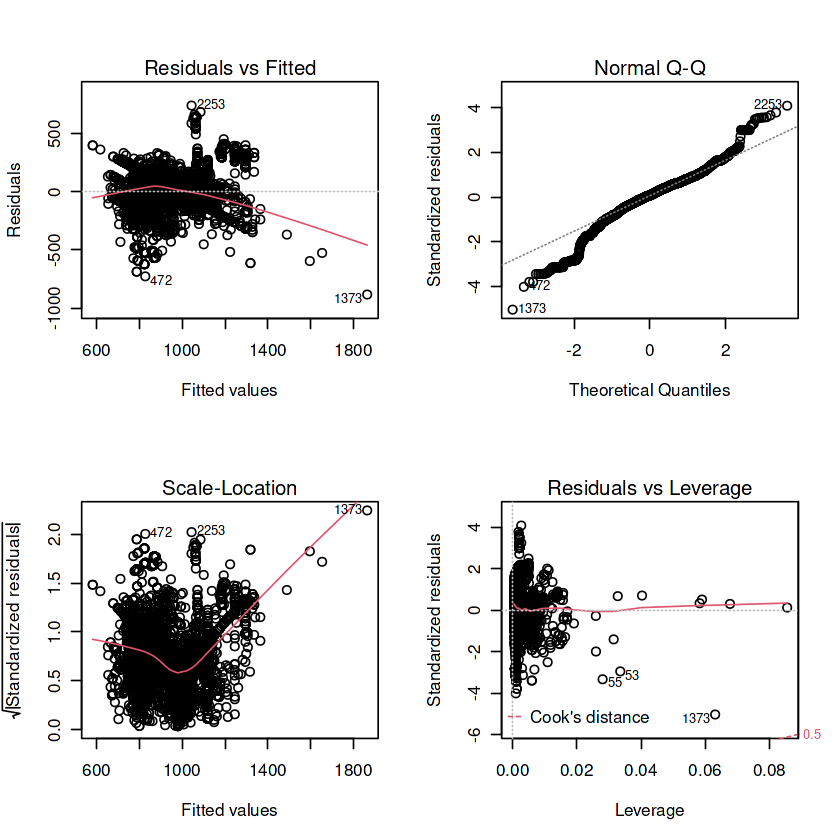

In [66]:
par(mfrow=c(2,2))
plot(model2)

### Tìm khoảng tin cậy cho giá trị dự đoán của mô hình

In [67]:
predictions<-predict(model2, newdata=GPU_data, interval="confidence", level=0.95)
head(predictions)

,fit,lwr,upr
1,928.5765,917.6796,939.4733
2,874.0686,859.1082,889.0291
3,862.2188,846.2663,878.1713
4,960.3898,948.4840,972.2957
5,847.9770,837.6320,858.3219
6,953.8425,942.5379,965.1470
